In [36]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
luccagodoy_obfuscated_malware_memory_2022_cic_path = kagglehub.dataset_download('luccagodoy/obfuscated-malware-memory-2022-cic')

print('Data source import complete.')


Data source import complete.


# Make Sure to cite our work :D

In [37]:
# @inproceedings{10.1145/3644713.3644768,
# author = {Abid, Mohammed Nadhir and Beggas, Mounir and Laouid, Abdelkader},
# title = {Machine/Deep Learning for obfuscated malware Detection},
# year = {2024},
# isbn = {9798400709036},
# publisher = {Association for Computing Machinery},
# address = {New York, NY, USA},
# url = {https://doi.org/10.1145/3644713.3644768},
# doi = {10.1145/3644713.3644768},
# booktitle = {Proceedings of the 7th International Conference on Future Networks and Distributed Systems},
# pages = {390–396},
# numpages = {7},
# keywords = {Machine Learning, classification, cybersecurity, data imbalance, deep learning, malware},
# location = {Dubai, United Arab Emirates},
# series = {ICFNDS '23}
# }

# Data Preproccessing

## Data Loading

In [38]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [39]:
original_df = pd.read_csv('Obfuscated-MalMem2022.csv', sep=',', encoding='utf-8')
original_df.shape

(58596, 57)

In [40]:
original_df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,417.183374,221.406581,25.996245,26.878388,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,161.592795,1.991087,0.170790,11.283432,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,392.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,1441.000000,222.000000,26.000000,97.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [41]:
original_df.tail(150)

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
58446,Ransomware-Shade-fac0837a5f1d610f0012c7655e85a...,32,12,10.843750,0,192.968750,1222,38.187500,6175,192.968750,...,219,26,97,110,0,114,88,0,8,Malware
58447,Ransomware-Shade-955d9af38346c1755527bd196668e...,40,16,9.850000,0,209.150000,1564,39.100000,8366,209.150000,...,221,26,97,116,0,123,86,0,8,Malware
58448,Ransomware-Shade-f454622ad2ea0179431365de97aa7...,44,17,9.568182,0,207.159091,1729,39.295455,9115,207.159091,...,221,26,97,116,0,122,86,0,8,Malware
58449,Ransomware-Shade-f8706f16346098dca17ca6852b21d...,44,17,9.227273,0,197.045455,1656,37.636364,8670,197.045455,...,221,26,97,116,0,122,86,0,8,Malware
58450,Ransomware-Shade-fac0837a5f1d610f0012c7655e85a...,34,12,10.411765,0,185.970588,1270,37.352941,6323,185.970588,...,219,26,97,110,0,116,88,0,8,Malware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,97,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,97,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,97,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,97,116,0,120,87,0,8,Malware


## Data Cleaning

In [42]:
df = original_df.copy()
df.shape

(58596, 57)

In [43]:
import pandas as pd

def select_every_nth_row(df, n=1000):
    """
    Select every nth row from a DataFrame.

    Parameters:
    - df: The input DataFrame.
    - n: The interval for row selection (default is 1000).

    Returns:
    - A new DataFrame containing every nth row from the input DataFrame.
    """
    selected_rows = df.iloc[::n]
    return selected_rows

# Example usage:
# Assuming df is your DataFrame with shape (58596, 57)
selected_rows = select_every_nth_row(df, n=1000)

# Now, selected_rows contains the rows at the specified indices
#selected_rows

In [44]:
# Check if all values in each column are identical
for column in df.columns:
    if df[column].nunique() == 1:
        print(f"All values in {column} are identical.")

All values in pslist.nprocs64bit are identical.
All values in handles.nport are identical.
All values in svcscan.interactive_process_services are identical.


In [45]:
# drop identical columns
# List of columns to drop
columns_to_drop = ['pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [46]:
import pandas as pd
from scipy.stats import zscore

# Print the number of missing values
print("Number of Missing Values:")
print(df.isnull().sum())

# Print the number of duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# Handling Missing Values
df.fillna(method="ffill", inplace=True)  # Forward fill missing values

# Removing Duplicates
df.drop_duplicates(inplace=True)

# Data Type Conversion
# df["Class"] = df["Class"].astype("category")

#Outlier Handling (Example: Using Z-score)
# z_scores = zscore(df.select_dtypes(include=['int64', 'float64']))
# df = df[(z_scores < 3).all(axis=1)]

# Handling Categorical Data (One-Hot Encoding)
df = pd.get_dummies(df, columns=["Class"], drop_first=True)

# Feature Scaling (Min-Max Scaling)
# df[df.select_dtypes(include=['int64', 'float64']).columns] = \
#     (df[df.select_dtypes(include=['int64', 'float64']).columns] - df[df.select_dtypes(include=['int64', 'float64']).columns].min()) / \
#     (df[df.select_dtypes(include=['int64', 'float64']).columns].max() - df[df.select_dtypes(include=['int64', 'float64']).columns].min())

# Removing Unnecessary Columns
# columns_to_remove = ["Column1", "Column2"]  # List of columns to remove
# df.drop(columns=columns_to_remove, inplace=True)


Number of Missing Values:
Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init                    0
ldrmodules.not_in_mem                     0
ldrmod

C:\Users\okore\AppData\Local\Temp\ipykernel_18632\3489326601.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill missing values


In [47]:
df

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nfile,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class_Malware
0,Benign,45,17,10.555556,202.844444,1694,38.500000,9129,212.302326,670,...,389,221,26,24,116,121,87,0,8,False
1,Benign,47,19,11.531915,242.234043,2074,44.127660,11385,242.234043,840,...,392,222,26,24,118,122,87,0,8,False
2,Benign,40,14,14.725000,288.225000,1932,48.300000,11529,288.225000,1050,...,395,222,26,27,118,120,88,0,8,False
3,Benign,32,13,13.500000,264.281250,1445,45.156250,8457,264.281250,630,...,395,222,26,27,118,120,88,0,8,False
4,Benign,42,16,11.452381,281.333333,2067,49.214286,11816,281.333333,908,...,392,222,26,24,118,124,87,0,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,215.486487,1453,39.270270,7973,215.486487,630,...,1441,221,26,97,116,120,86,0,8,True
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,190.216216,1347,36.405405,7038,190.216216,603,...,1441,221,26,97,116,116,88,0,8,True
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,210.026316,1448,38.105263,7982,215.729730,624,...,1441,221,26,97,116,120,88,0,8,True
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,215.513513,1452,39.243243,7974,215.513513,632,...,1441,221,26,97,116,120,87,0,8,True


In [48]:
# Data Sanity Check
print("\nData Info:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 58062 entries, 0 to 58595
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58062 non-null  object 
 1   pslist.nproc                            58062 non-null  int64  
 2   pslist.nppid                            58062 non-null  int64  
 3   pslist.avg_threads                      58062 non-null  float64
 4   pslist.avg_handlers                     58062 non-null  float64
 5   dlllist.ndlls                           58062 non-null  int64  
 6   dlllist.avg_dlls_per_proc               58062 non-null  float64
 7   handles.nhandles                        58062 non-null  int64  
 8   handles.avg_handles_per_proc            58062 non-null  float64
 9   handles.nfile                           58062 non-null  int64  
 10  handles.nevent                          58062 non-n

In [49]:
print("DataFrame Shape:", df.shape)
print("Class Distribution:", df["Class_Malware"].value_counts())

DataFrame Shape: (58062, 54)
Class Distribution: Class_Malware
False    29231
True     28831
Name: count, dtype: int64


In [50]:
# Print the number of missing values
print("Number of Missing Values:")
print(df.isnull().sum())

Number of Missing Values:
Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init                    0
ldrmodules.not_in_mem                     0
ldrmod

## Feature extraction

In [51]:
def categorize_malware(s):
    if s == "Benign":
        return "Benign"
    else:
        primary_type = s.split("-")[0]
        return primary_type

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate features and target
#y = df["Category"].apply(categorize_malware)

y = df["Class_Malware"]
X = df.drop(columns=["Category", "Class_Malware"])

In [53]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
y

0        False
1        False
2        False
3        False
4        False
         ...  
58591     True
58592     True
58593     True
58594     True
58595     True
Name: Class_Malware, Length: 58062, dtype: bool

In [54]:
# import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize your features (recommended before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

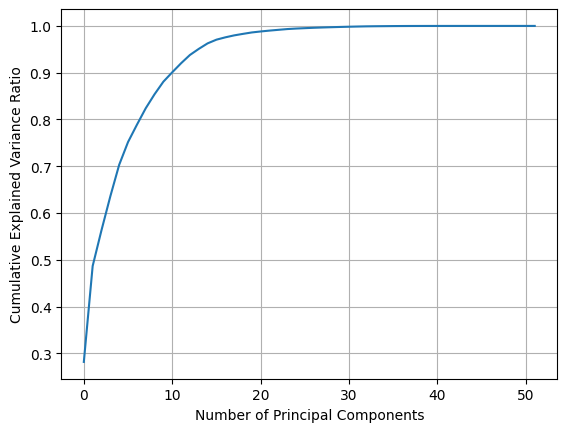

In [55]:
# Apply PCA for feature extraction
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [56]:
# Determine the number of components to retain (e.g., capturing 95% of variance)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components to retain for 95% variance: {n_components}")

# Now you can perform PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Number of components to retain for 95% variance: 14


In [57]:
# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)

Explained Variance Ratios: [0.28151527 0.20510294 0.07664082 0.07252969 0.06728464 0.04859866
 0.03683036 0.03538662 0.03003356 0.02688908 0.02002998 0.01934825
 0.01767585 0.01302292]


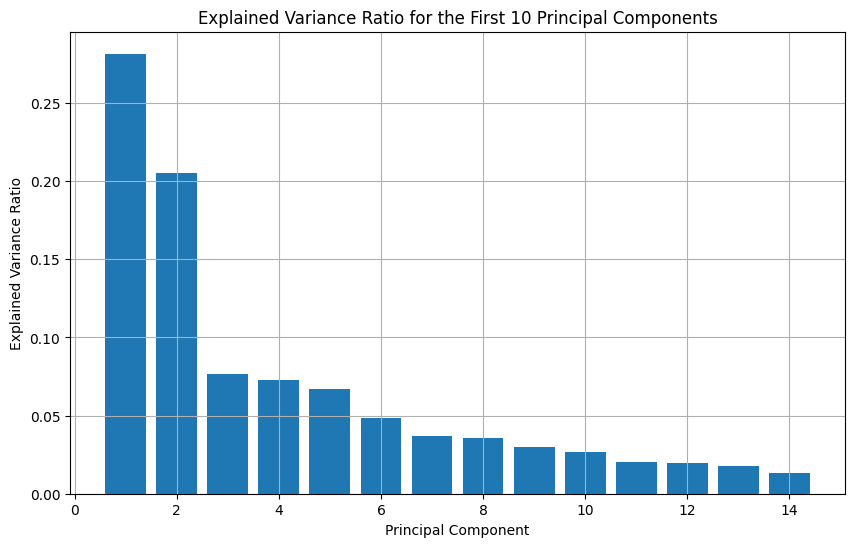

In [58]:
# Plot explained variance ratios for the first 10 components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for the First 10 Principal Components')
plt.grid(True)
plt.show()

In [26]:
from sklearn.manifold import TSNE

# Feature extraction using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

C:\Users\okore\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [27]:
print(X_tsne)

[[ -4.092302     1.7104058 ]
 [  2.9627016    7.0036163 ]
 [ -0.15436384 -12.260448  ]
 ...
 [ -8.2837      -2.9186282 ]
 [ -8.177229   -10.752214  ]
 [-16.094156     0.48454884]]


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# # Feature extraction using LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [29]:
X_lda

array([[ 3.72722886],
       [-1.09992324],
       [-8.27460227],
       ...,
       [ 4.15349867],
       [ 4.42348741],
       [ 4.20224889]])

In [130]:
print(df["Class_Malware"].unique())

[False  True]


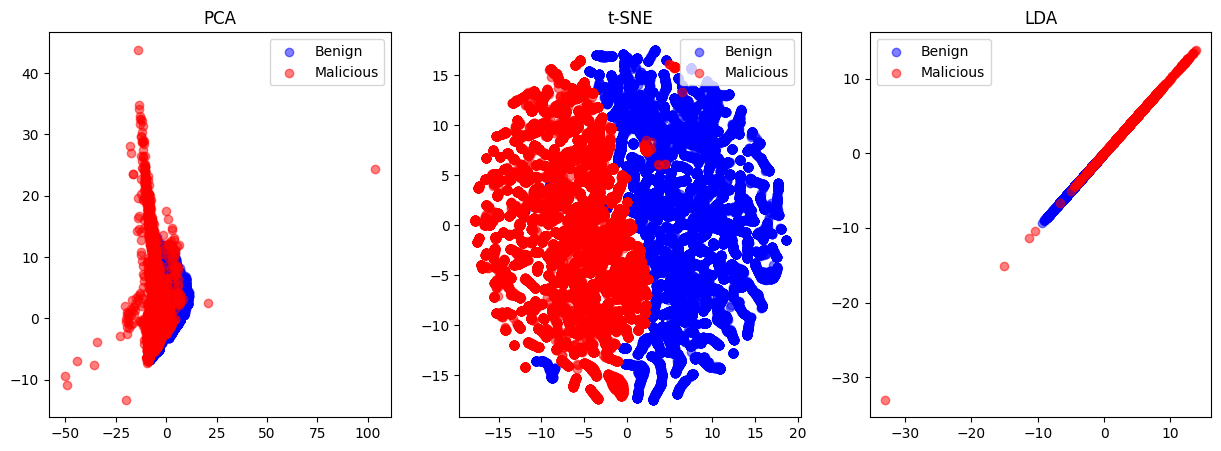

In [131]:
import matplotlib.pyplot as plt

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot PCA
axes[0].scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label="Benign", color="blue", alpha=0.5)
axes[0].scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label="Malicious", color="red", alpha=0.5)
axes[0].set_title("PCA")
axes[0].legend()

# Plot t-SNE
axes[1].scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], label="Benign", color="blue", alpha=0.5)
axes[1].scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], label="Malicious", color="red", alpha=0.5)
axes[1].set_title("t-SNE")
axes[1].legend()

# Plot LDA
axes[2].scatter(X_lda[y == 0, 0], X_lda[y == 0, 0], label="Benign", color="blue", alpha=0.5)
axes[2].scatter(X_lda[y == 1, 0], X_lda[y == 1, 0], label="Malicious", color="red", alpha=0.5)
axes[2].set_title("LDA")
axes[2].legend()

plt.show()

### XGBOOST Train an Initial XGBoost Model

In [59]:
# Import necessary libraries
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# XGBoost for Feature Extraction
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Use the trained XGBoost model to get feature importances
feature_importances = xgb_model.feature_importances_

# Select the top N important features
N = 14  # Change this value based on the number of features you want to select
selected_feature_indices = np.argsort(feature_importances)[::-1][:N]
selected_features = X.columns[selected_feature_indices]

# Subset the dataset with the selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

In [60]:
from sklearn.metrics import accuracy_score, classification_report

selected_cols = ["svcscan.nservices","svcscan.process_services"]

# Normalize the data
scaler = StandardScaler()
X_train_select_2 = scaler.fit_transform(X_train[selected_cols])
X_test_select_2 = scaler.transform(X_test[selected_cols])

xgb_model_selected = xgb.XGBClassifier()
xgb_model_selected.fit(X_train_select_2, y_train)

y_pred = xgb_model_selected.predict(X_test_select_2)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9983925598484413
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8803
        True       1.00      1.00      1.00      8616

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419



In [61]:
# ann = MLPClassifier(
#     hidden_layer_sizes=(150, 60,10),
#     activation='logistic',
#     solver='sgd',
#     max_iter=500,
#     random_state=42
# )
# ann.fit(X_train_selected, y_train)

# # Evaluate
# y_pred = ann.predict(X_test_selected)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred, zero_division=0))

### Feature Importance Scores

### Sort and Visualize Feature Importances

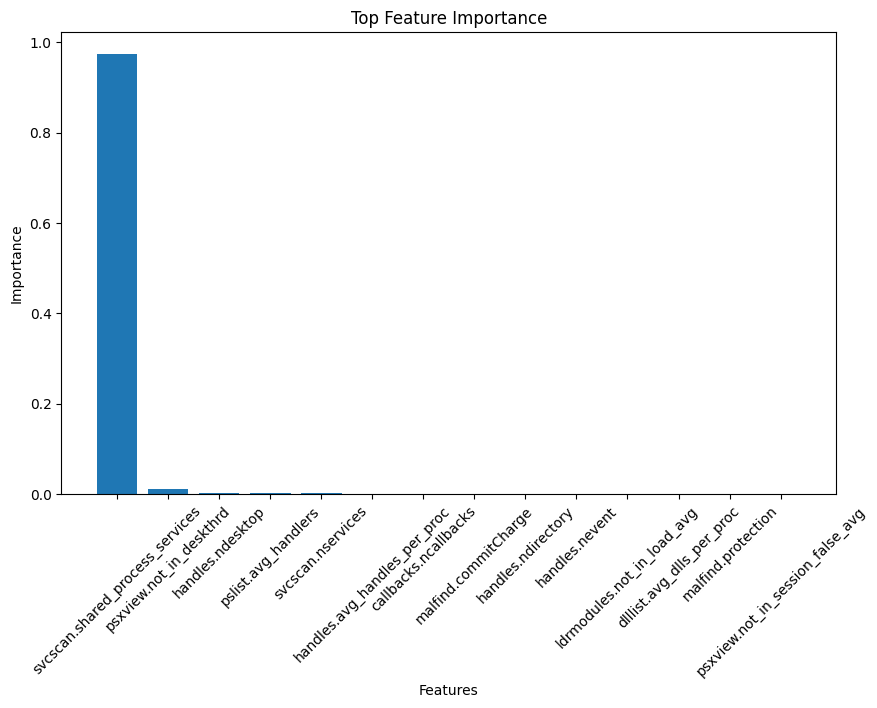

In [62]:
# Sort and visualize feature importances
N = 14  # Number of top features to select
sorted_indices = np.argsort(feature_importances)[::-1]
selected_features = X.columns[sorted_indices[:N]]

plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_importances[sorted_indices[:N]])
plt.title('Top Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


In [63]:
selected_features

Index(['svcscan.shared_process_services', 'psxview.not_in_deskthrd',
       'handles.ndesktop', 'pslist.avg_handlers', 'svcscan.nservices',
       'handles.avg_handles_per_proc', 'callbacks.ncallbacks',
       'malfind.commitCharge', 'handles.ndirectory', 'handles.nevent',
       'ldrmodules.not_in_load_avg', 'dlllist.avg_dlls_per_proc',
       'malfind.protection', 'psxview.not_in_session_false_avg'],
      dtype='object')

In [64]:
import os
import joblib
# XGBoost Model
xgb_model = os.path.join('.', 'xgb_model.pkl')
joblib.dump({'scaler': scaler, 'model': xgb_model_selected}, 'xgb_model.pkl')

print(f"Saved XGBoost to {xgb_model}")

Saved XGBoost to .\xgb_model.pkl


In [65]:
from joblib import load
import pandas as pd

# Load the saved model
saved_model = load('xgb_model.pkl') 

scaler = saved_model['scaler']
model = saved_model['model']

data = {'svcscan.nservices': 1421, 'svcscan.process_services': 97}
data_df = pd.DataFrame([data])

#X_new_scaled = scaler.transform(X_new)  # Scale new data
#predictions = model.predict(X_new_scaled)

# Predict class probabilities (for classification)
probabilities = model.predict_proba(data_df)
print(probabilities)

# Predict class labels (classification)
predictions = model.predict(data_df)
print(predictions)
# print("Accuracy:", accuracy_score(y_test, predictions))
# print(classification_report(y_test, predictions, zero_division=0))

[[9.0277195e-04 9.9909723e-01]]
[1]


# Deep Learning RNN

In [ ]:
import torch

# Split the data into training and testing sets
# X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_train_selected, y_train_encoded, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train_selected).float()
y_train_tensor = torch.from_numpy(y_train.values).long()
X_test_tensor = torch.from_numpy(X_test_selected ).float()
y_test_tensor = torch.from_numpy(y_test.values).long()

# Print the shapes of the tensors
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import numpy as np

## Define the deep learning model

In [ ]:
# class MalwareDetector(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MalwareDetector, self).__init__()
#         self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         out, _ = self.rnn(x)
#         print("Shape of out:", out.shape)  # Print the shape of the out tensor
#         last_output = out[:, -1, :]  # Get the output from the last time step
#         out = self.fc(last_output)
#         return out

#     def forward(self, x):
#         out, _ = self.rnn(x)
#         out = self.fc(out[:, -1, :])  # Get the last output of the RNN
#         return out
class MalwareDetector(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MalwareDetector, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add a time step dimension
        out, _ = self.rnn(x)
        last_output = out[:, -1, :]  # Get the output from the last time step
        out = self.fc(last_output)
        return out

## Initialize the model

In [ ]:
# input_size = len(X_train[0])
# hidden_size = 128
# output_size = 2  # 2 classes: benign and malicious
# model = MalwareDetector(input_size, hidden_size, output_size)
# Create an instance of your model
input_size = X_train_tensor.shape[1]  # Number of features
hidden_size = 64  # Number of hidden units
output_size = 2  # Number of classes
model = MalwareDetector(input_size, hidden_size, output_size)

## Define loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Create a PyTorch DataLoader for training and testing

In [ ]:
# Move the model to a device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
train_dataset = data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = data.TensorDataset(X_test_tensor, y_test_tensor)
test_loader = data.DataLoader(test_dataset, batch_size=32, shuffle=False)

## Training loop

In [ ]:
import torch
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Initialize lists to store metrics
train_losses = []
train_accuracies = []
train_auc_scores = []
test_losses = []
test_accuracies = []
test_auc_scores = []

epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss_sum = 0.0
    num_correct_train = 0
    num_samples_train = 0
    y_true_train = []
    y_pred_train = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predictions = torch.max(outputs, 1)
        num_correct_train += (predictions == labels).sum().item()
        num_samples_train += labels.size(0)
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(predictions.cpu().numpy())

        train_loss_sum += loss.item()

    # Calculate training accuracy and AUC
    train_accuracy = num_correct_train / num_samples_train
    train_auc = roc_auc_score(y_true_train, y_pred_train)

    # Calculate average training loss
    average_train_loss = train_loss_sum / len(train_loader)

    # Evaluate on the testing dataset
    model.eval()
    test_loss_sum = 0.0
    num_correct_test = 0
    num_samples_test = 0
    y_true_test = []
    y_pred_test = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, predictions = torch.max(outputs, 1)
            num_correct_test += (predictions == labels).sum().item()
            num_samples_test += labels.size(0)
            y_true_test.extend(labels.cpu().numpy())
            y_pred_test.extend(predictions.cpu().numpy())

            test_loss_sum += loss.item()

    # Calculate testing accuracy and AUC
    test_accuracy = num_correct_test / num_samples_test
    test_auc = roc_auc_score(y_true_test, y_pred_test)

    # Calculate average testing loss
    average_test_loss = test_loss_sum / len(test_loader)

    # Print epoch-wise metrics
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {average_train_loss:.4f} - "
          f"Train Acc: {train_accuracy:.4f} - "
          f"Train AUC: {train_auc:.4f} - "
          f"Test Loss: {average_test_loss:.4f} - "
          f"Test Acc: {test_accuracy:.4f} - "
          f"Test AUC: {test_auc:.4f}")

    # Store metrics for later analysis or plotting
    train_losses.append(average_train_loss)
    train_accuracies.append(train_accuracy)
    train_auc_scores.append(train_auc)
    test_losses.append(average_test_loss)
    test_accuracies.append(test_accuracy)
    test_auc_scores.append(test_auc)

print("Training finished.")

## Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

model.eval()
correct = 0
total = 0
all_predicted = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = 100 * correct / total

print(f'Test Accuracy: {accuracy:.2f}%')

# Calculate additional metrics and display the classification report
print("Classification Report:")
class_names = ["Benign", "Malicious"]
print(classification_report(all_labels, all_predicted, target_names=class_names))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(all_labels, all_predicted)
print(conf_matrix)

# Calculate Sensitivity and Specificity
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Deep Learning DNN + RNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Assuming you have already loaded and preprocessed the CIC-MalMem-2022 dataset
# X_train: Training data (memory dumps)
# y_train: Training labels (0 for benign, 1 for malicious)
# X_test: Testing data
# y_test: Testing labels

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_tsne, y.values, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train_encoded).long()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test_encoded).long()

# Print the shapes of the tensors
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)


## Define the deep neural network for malware detection

In [ ]:
# Define the deep neural network for malware detection
class MalwareDetector(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MalwareDetector, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.rnn = nn.RNN(hidden_size, hidden_size, batch_first=True)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add a time step dimension
        out = torch.relu(self.fc1(x))
        out = torch.relu(self.fc2(out))
        out, _ = self.rnn(out)
        out = self.fc3(out[:, -1, :])  # Get the last output of the RNN
        return out

## Initialize the model

In [ ]:
input_size = len(X_train[0])
hidden_size = 128
output_size = 2  # 2 classes: benign and malicious
model = MalwareDetector(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Create a PyTorch DataLoader for training and testing

In [ ]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

## Training loop

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import roc_auc_score

# Initialize variables to store metrics
train_losses = []
train_accuracies = []
train_auc_scores = []
test_losses = []
test_accuracies = []
test_auc_scores = []

train_loss_sum = 0.0
num_correct_train = 0
num_samples_train = 0
y_true_train = []
y_pred_train = []

model_metrics = {}

model_metrics["DNN MalwareDetector"] = {}

# Define the number of epochs
epochs = 10

# Loop through epochs
for epoch in range(epochs):
    model.train()

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate training loss
        train_loss_sum += loss.item() * inputs.size(0)

        # Calculate number of correct predictions and total samples in the current batch
        _, predicted_train = torch.max(outputs.data, 1)
        num_correct_train += (predicted_train == labels).sum().item()
        num_samples_train += labels.size(0)

        # Store true labels and predicted labels for AUC calculation
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(predicted_train.cpu().numpy())

    # Calculate training accuracy
    train_accuracy = 100 * num_correct_train / num_samples_train
    train_losses.append(train_loss_sum / num_samples_train)
    train_accuracies.append(train_accuracy)

    # Calculate AUC score for training data
    train_auc = roc_auc_score(y_true_train, y_pred_train, average='weighted')
    train_auc_scores.append(train_auc)

    # Evaluate the model on the test set
    model.eval()
    test_loss_sum = 0.0
    num_correct_test = 0
    num_samples_test = 0
    y_true_test = []
    y_pred_test = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss_sum += loss.item() * inputs.size(0)

            # Calculate number of correct predictions and total samples in the current batch
            _, predicted_test = torch.max(outputs.data, 1)
            num_correct_test += (predicted_test == labels).sum().item()
            num_samples_test += labels.size(0)

            # Store true labels and predicted labels for AUC calculation
            y_true_test.extend(labels.cpu().numpy())
            y_pred_test.extend(predicted_test.cpu().numpy())

    # Calculate test accuracy
    test_accuracy = 100 * num_correct_test / num_samples_test
    test_losses.append(test_loss_sum / num_samples_test)
    test_accuracies.append(test_accuracy)

    # Calculate AUC score for test data
    test_auc = roc_auc_score(y_true_test, y_pred_test, average='weighted')
    test_auc_scores.append(test_auc)



    # Print epoch-wise metrics
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Train Accuracy: {train_accuracy:.2f}%, "
          f"Train AUC: {train_auc:.4f}, "
          f"Test Loss: {test_losses[-1]:.4f}, "
          f"Test Accuracy: {test_accuracy:.2f}%, "
          f"Test AUC: {test_auc:.4f}")

print("Training finished.")


In [ ]:
import matplotlib.pyplot as plt

# Create an array for the epoch numbers (x-axis)
epochs_list = range(1, epochs + 1)

# Plot Training and Testing Losses
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(epochs_list, train_losses, label='Train Loss', marker='o')
plt.plot(epochs_list, test_losses, label='Test Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.legend()

# Plot Training and Testing Accuracies
plt.subplot(132)
plt.plot(epochs_list, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs_list, test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracies')
plt.legend()

# Plot Training and Testing AUC Scores
plt.subplot(133)
plt.plot(epochs_list, train_auc_scores, label='Train AUC', marker='o')
plt.plot(epochs_list, test_auc_scores, label='Test AUC', marker='x')
plt.xlabel('Epochs')
plt.ylabel('AUC Score')
plt.title('Training and Testing AUC Scores')
plt.legend()

# Display all plots
plt.tight_layout()
plt.show()


## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef, auc, precision_recall_curve, classification_report

model.eval()
correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Store true labels and predicted labels for evaluation
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate accuracy
accuracy = 100 * correct / total

# Calculate additional evaluation metrics
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)
conf_matrix = confusion_matrix(y_true, y_pred)

model_metrics["DNN MalwareDetector"]["Accuracy"] = accuracy
model_metrics["DNN MalwareDetector"]["Precision"] = precision[0]
model_metrics["DNN MalwareDetector"]["Recall"] = recall[0]
model_metrics["DNN MalwareDetector"]["F1 Score"] = f1[0]
model_metrics["DNN MalwareDetector"]["Confusion Matrix"] = conf_matrix

# Calculate Sensitivity and Specificity
sensitivity = recall[1]
specificity = recall[0]

# Calculate MCC
mcc = matthews_corrcoef(y_true, y_pred)

# Calculate AUC-PR
precision, recall, _ = precision_recall_curve(y_true, y_pred)
auc_pr = auc(recall, precision)

# Print results
print(f'Test Accuracy: {accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Benign", "Malicious"]))
print('Confusion Matrix:')
print(conf_matrix)
print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Visualize Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


# Other Models For comparison

## Logistic Regression

In [ ]:
import torch.nn.functional as F

class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__()
        self.fc1 = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        out = self.fc1(x)
        return F.softmax(out, dim=1)

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=0.01)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=50,  # Reduce the number of trees
    max_depth=5,      # Limit the depth of trees
    min_samples_split=2,  # Increase the minimum samples required to split
    min_samples_leaf=1,   # Increase the minimum samples required for a leaf
    random_state=42
)

In [ ]:
# Sort and visualize feature importances
N = 14  # Number of top features to select
sorted_indices = np.argsort(feature_importances)[::-1]
selected_features = X.columns[sorted_indices[:N]]

plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_importances[sorted_indices[:N]])
plt.title('Top Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()## MLP

In [ ]:
import torch.nn as nn

class NeuralNetworkClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetworkClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        out = torch.relu(self.fc1(x))
        out = self.fc2(out)
        return torch.softmax(out, dim=1)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier with reduced estimators
gb_classifier = GradientBoostingClassifier(n_estimators=20, random_state=21)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

logistic_regression_model = LogisticRegression(input_size, output_size)

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train_encoded)

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train_encoded)

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train_encoded)

# Train and evaluate models
models = {
    "Logistic Regression": logistic_regression_model,
    "SVM": svm_classifier,
    "Random Forest": rf_classifier,
    "Gradient Boosting": gb_classifier,
}



for model_name, model in models.items():
    model_metrics[model_name] = {}

    if model_name == "Logistic Regression":
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()
        epochs = 10

        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            outputs = model(X_test_tensor)
            _, predicted = torch.max(outputs.data, 1)

            accuracy = accuracy_score(y_test_encoded, predicted)
            precision = precision_score(y_test_encoded, predicted)
            recall = recall_score(y_test_encoded, predicted)
            f1 = f1_score(y_test_encoded, predicted)
            conf_matrix = confusion_matrix(y_test_encoded, predicted)

        model_metrics[model_name]["Accuracy"] = accuracy
        model_metrics[model_name]["Precision"] = precision
        model_metrics[model_name]["Recall"] = recall
        model_metrics[model_name]["F1 Score"] = f1
        model_metrics[model_name]["Confusion Matrix"] = conf_matrix
    else:
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test_encoded, y_pred)
        precision = precision_score(y_test_encoded, y_pred)
        recall = recall_score(y_test_encoded, y_pred)
        f1 = f1_score(y_test_encoded, y_pred)
        conf_matrix = confusion_matrix(y_test_encoded, y_pred)

        model_metrics[model_name]["Accuracy"] = accuracy
        model_metrics[model_name]["Precision"] = precision
        model_metrics[model_name]["Recall"] = recall
        model_metrics[model_name]["F1 Score"] = f1
        model_metrics[model_name]["Confusion Matrix"] = conf_matrix


In [ ]:
# Print model metrics
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names and metric values
model_names = list(model_metrics.keys())
accuracies = [metrics['Accuracy'] for metrics in model_metrics.values()]
precisions = [metrics['Precision'] for metrics in model_metrics.values()]
recalls = [metrics['Recall'] for metrics in model_metrics.values()]
f1_scores = [metrics['F1 Score'] for metrics in model_metrics.values()]

# Create a bar plot for accuracy
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Create a bar plot for precision
plt.figure(figsize=(10, 5))
plt.bar(model_names, precisions, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Create a bar plot for recall
plt.figure(figsize=(10, 5))
plt.bar(model_names, recalls, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Recall Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Create a bar plot for F1-score
plt.figure(figsize=(10, 5))
plt.bar(model_names, f1_scores, color='lightsalmon')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()